# Case-study (Linear Regression)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#let us import the data set
data=pd.read_csv("C:/Users/USER/Downloads/car_age_price.csv")
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [11]:
# are there any null values in the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [12]:
#finding the summary statistics
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


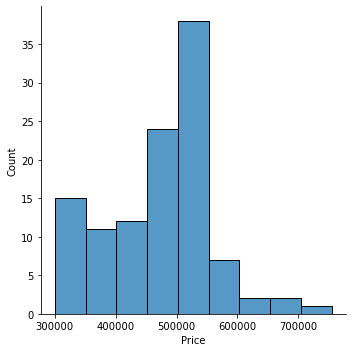

In [13]:
sns.displot(data["Price"])


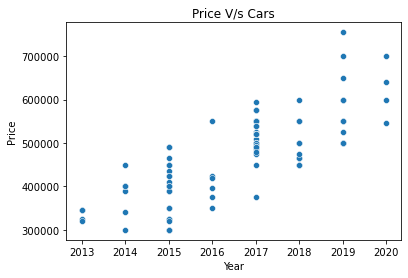

In [14]:
#inorder to predict the price value using year,we want to check whether any relation exist btwn them
#for that first we draw a scatterplot 
sns.scatterplot(x="Year",y="Price",data=data)
plt.title("Price V/s Cars")
plt.show()

In [15]:
# so from the figure we could infer that there is a realtnship,a positive one for sure,but we have to show it through a numerical value
#for that we use correaltion,to show the strength of their relationship
corr=data.corr()
corr

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


<AxesSubplot:xlabel='Year', ylabel='Price'>

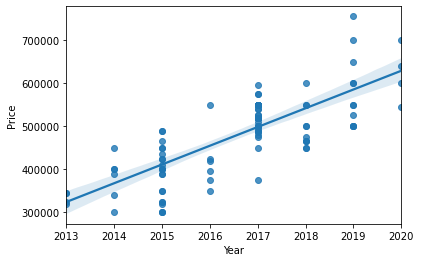

In [16]:
# year and price have a significant positive realtion
#draw a line thorugh the y values such that  mse is minimnum
sns.regplot(x="Year",y="Price",data=data)

In [17]:
#reshape the values so that it changes into the format that the library accepts
X=data["Year"].values.reshape(-1,1)
y=data["Price"].values.reshape(-1,1)

In [18]:
from sklearn.model_selection import train_test_split
#split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        random_state=123)

## Linear-Regression

In [19]:
#lets fit the data using Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)

In [20]:
#Now,let us predict
y_pred=lr.predict(X_test)
y_pred

array([[500375.58892302],
       [500375.58892302],
       [544465.56722482],
       [368105.65401764],
       [412195.63231944],
       [500375.58892302],
       [368105.65401764],
       [588555.54552661],
       [456285.61062123],
       [412195.63231944],
       [500375.58892302],
       [412195.63231944],
       [544465.56722482],
       [324015.67571585],
       [412195.63231944],
       [544465.56722482],
       [500375.58892302],
       [632645.5238284 ],
       [500375.58892302],
       [588555.54552661],
       [500375.58892302],
       [456285.61062123],
       [500375.58892302]])

In [21]:
p=lr.predict([[2015]]).round(2)
print("the price of Hyundai car in 2015 is",p)

the price of Hyundai car in 2015 is [[412195.63]]


In [22]:
#question was to predict the value for the year 2022

In [23]:
p1=lr.predict([[2022]]).round(2)
print("For a 2022 model second-hand grand i10 the price will be",p1)

For a 2022 model second-hand grand i10 the price will be [[720825.48]]


In [24]:
#let us check the performance of the model

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
rsqr_lr = r2_score(y_test, y_pred)
mse_lr = mean_squared_error(y_test,y_pred)
print("The R-Sqaure value for linear regression model for predicting car price is",rsqr_lr)

The R-Sqaure value for linear regression model for predicting car price is 0.627315978949827


## Lasso-regression 

In [26]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [27]:
lasso.fit(X_train,y_train)

Lasso()

In [28]:
y_pred1=lasso.predict(X_test)
y_pred1
rsqr_lasso = r2_score(y_test, y_pred1)
print("The R-Sqaure value for lasso regression model for predicting car price is",rsqr_lasso)
# By inferring the R squared value both linear and lasso regression model have equal performance level.

The R-Sqaure value for lasso regression model for predicting car price is 0.6273167858804423
